<a href="https://colab.research.google.com/github/QuangLe102/AI/blob/main/BT_ANN_ROBOT3BACTUDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import thư viện

from sklearn.utils import shuffle
import cv2
import pickle
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten
from tensorflow.keras.utils import to_categorical 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
import csv

In [6]:
l1 = 50
l2 = 40 
l3 = 20
z=[]
for t1 in range(0,180,1):
  for t2 in range(0,180,1):
    t3 = 90 - t1 - t2
    x=l1*math.cos(math.radians(t1))+l2*math.cos(math.radians(t1+t2))+l3*math.cos(math.radians(t1+t2+t3))
    y=l1*math.sin(math.radians(t1))+l2*math.sin(math.radians(t1+t2))+l3*math.sin(math.radians(t1+t2+t3))
    
    t1 = t1/180
    t2 = t2/180
    t3 = (t3+180.0)/270.0
    x = (x+110)/220
    y = (y+110)/220
    z.append(np.array((t1,t2,t3,x,y)))

label = ['theta1', 'theta2','theta3', 'x', 'y']
with open('data3btd.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(label)
    writer.writerows(z)

In [8]:
data = pd.read_csv('data3btd.csv')
numpy_dataset = data.values
y=numpy_dataset[:,:3]
x=numpy_dataset[:,3:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape

(25920, 2)

In [9]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3))

model.compile(loss='mse', optimizer =Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)

Epoch 1/10
648/648 [==============================] - 2s 3ms/step - loss: 0.0107 - accuracy: 0.9197 - val_loss: 1.7772e-04 - val_accuracy: 0.9873
Epoch 2/10
648/648 [==============================] - 2s 3ms/step - loss: 1.4423e-04 - accuracy: 0.9918 - val_loss: 8.9413e-05 - val_accuracy: 0.9996
Epoch 3/10
648/648 [==============================] - 1s 2ms/step - loss: 1.2240e-04 - accuracy: 0.9935 - val_loss: 9.6551e-05 - val_accuracy: 0.9873
Epoch 4/10
648/648 [==============================] - 2s 2ms/step - loss: 9.1545e-05 - accuracy: 0.9927 - val_loss: 4.3004e-05 - val_accuracy: 0.9956
Epoch 5/10
648/648 [==============================] - 2s 3ms/step - loss: 8.5732e-05 - accuracy: 0.9928 - val_loss: 6.1597e-05 - val_accuracy: 0.9904
Epoch 6/10
648/648 [==============================] - 1s 2ms/step - loss: 7.2206e-05 - accuracy: 0.9922 - val_loss: 5.8651e-05 - val_accuracy: 0.9902
Epoch 7/10
648/648 [==============================] - 2s 2ms/step - loss: 6.0037e-05 - accuracy: 0.9928 

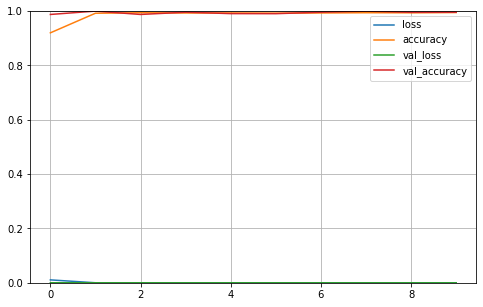

In [10]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

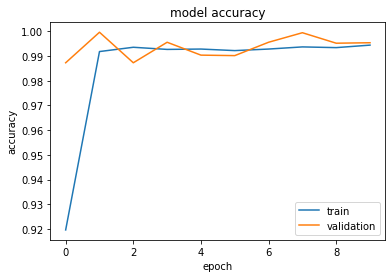

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [12]:
Px_test_train = 60
Py_test_train = 30
print(Px_test_train,Py_test_train)
ktra = model.predict([[Px_test_train,Py_test_train]])
t1 = ktra[0][0]
t2 = ktra[0][1]
t3 = ktra[0][2]
X=l1*math.cos(math.radians(t1))+l2*math.cos(math.radians(t1+t2))+l3*math.cos(math.radians(t1+t2+t3))
Y=l1*math.sin(math.radians(t1))+l2*math.sin(math.radians(t1+t2))+l3*math.sin(math.radians(t1+t2+t3))
print('x = ',X,'\ny = ',Y)
print('Góc Theta 1 = ', t1,'\nGóc Theta 2 = ', t2, '\nGóc Theta 3 = ', t3)

60 30
x =  91.07259046825521 
y =  -12.724897389730476
Góc Theta 1 =  6.6362877 
Góc Theta 2 =  -56.862503 
Góc Theta 3 =  87.9599
